# Métodos numéricos para solución de ecuaciones diferenciales
Notebook de Jean Carlo Trejo Sánchez

### 1. 3 El algoritmo de Verlet y sus principales variantes

El algoritmo para la solución de ecuaciones diferencuales de segundo orden ha tenido una historia larga y distinguida desde su apareción en el estudio de la dinámica de moléculas. Con este algoritmo se han obtenido resultados teóricos interesantes en el crecimiento de películas delgadas ,fatiga de materiales y predicción de estructuras estables en moléculas, cristales líquidos y en un sinmúmero de aplicaciones a sistemas microscópicos. A diferencia de los métodos de solución de ecuaciones diferenciales de segundo orden expuestos en los notebooks anteriores, en los cuales es necesario plantear un sistema de ecuaciones diferenciales (lo cual aumenta el número de operaciones a realizar en un programa de cómputo), con el algorítmo de Verlet es posible trabajar directamente sobre la segunda derivada, lo cual ofrece ventajas en la mayoría de las aplicaciones donde interviene la mecánica clásica. Sin embargo, como se verá más adelante, tiene limitaciones importantes en cuanto a la dependencia de la fuerza con la primera derivada, reduciendo de manera importante su aplicación en la simulación de movimiento a través de medios resistivos.



### 1.3.1 El algoritmo de Verlet
El algoritmo de Verlet en su forma clásica se deduce a partir de la expresión en serie de Taylor de la función de posición $x(t)$ en $x(t+\Delta t)$:

\begin{align*}
x(t+\Delta t) = x(t) + x'(x,t)\Delta t + x''(x,t)\frac{\Delta t^2}{2}+... \tag{1.34}
\end{align*}

y en $x(t-\Delta t)$:

\begin{align*}
x(t-\Delta t) = x(t) - x'(x,t)\Delta t + x''(x,t)\frac{\Delta t^2}{2}+... \tag{1.35}
\end{align*}

Sumando las ecuaciones (1.34) y (1.36) y considerando $\Delta t = h$ obtenemos:

\begin{align*} \tag{1.36}
x(t+h) \approx 2x(t)-x(t-h)+h^2x''(x,t)
\end{align*}

O bien, usando la notación de subíndices e introduciendo la segunda ley de Newton $F=mx''$

\begin{align*}
x_{n+1} = 2x_n - x_{n-1} + \frac{h^2}{m} F(x_n,t_n) \tag{1.37}
\end{align*}

Para su inicialización, es necesario, además de la posición y velocidades iniciales, calcular el valor correspondiente a $x(t=-h)$, (o bien $x_{-h}$) el cual se puede aproximar usando la ecuación (1.35), con $t=0$

\begin{align*}
x_{-1} = x_0 - v_0h + \frac{h^2}{2m} F(x_0,t_0) \tag{1.38}
\end{align*}

Así, se obtiene un método para la solución numérica de ecuaciones diferenciales de segundo grado, con una forma sencilla y que en sus aplicaciones en dinámica molecular (DM) ha resultado muy confortable, pues ofrece gran estabilidad para la energía del sistema.

A continuación se muestra el código para el ejemplo del péndulo. Nótese que en éste se han empleado las variables $x_0, x_1$ y $x_2$ para $x_{n-1}, x_{n}$ y $x_{n+1}$ respectivamente.

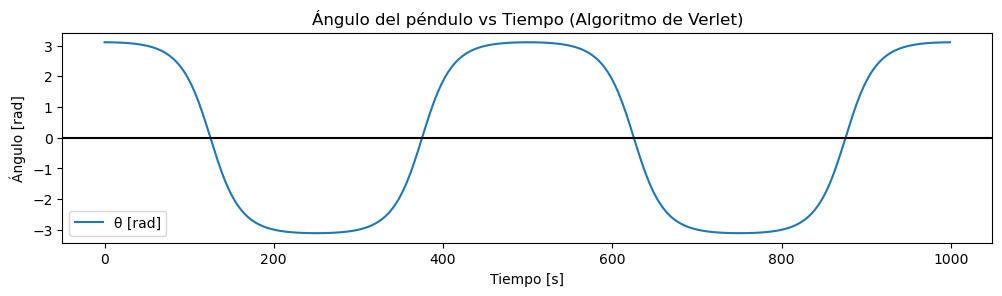

In [64]:
import numpy as np
import matplotlib.pyplot as plt

#Parámetros
h = 0.01 # [s] Intervalo de tiempo entre cada iteración
g = 9.81 # [m/s^2]
l = 0.5 # [m]
m = 1 # Kg
#Condiciones iniciales
x1 = 0.99*np.pi #[rad]
v = 0.0 #[m/s]

#Función que describe la aceleración
def f(x):
    return -(g/l)*np.sin(x)

#Declaración de los vectores donde se guardarán los valores
X = np.zeros(1000)
V = np.zeros(1000)
T = np.zeros(1000)


#Cálculo de la posición x(t=-h)
x0 = x1 - v*h + ((h**2)*f(x1))/(2*m)

#Simulación usando el algoritmo de Verlet
for t in range (1000):
    x2 = 2*x1 - x0 + ((h**2)*f(x1))/m
    x0=x1;
    x1=x2
    #Almacenando los valores de las variables a medida que se itera t
    X[t] = x0
    T[t] = t+h
    
#Graficando la función
plt.figure(figsize=(12,6))
#Gráfica θ (X) vs t
plt.subplot(2,1,1)
plt.plot(T,X, label = 'θ [rad]')
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.title('Ángulo del péndulo vs Tiempo (Algoritmo de Verlet)')
plt.legend();


### 1.3.2 Leap-Frog

Una variante del algoritmo de Verlet es llamado "algoritmo Leap-Frog", el cual resulta de plantear las siguientes aproximaciones a la velocidad, en base al teorema del valor medio:

\begin{align*}
v\left(t + \frac{h}{2} \right) = \frac{x(t+h)-x(t)}{h}
\tag{1.39}
\end{align*}

y 

\begin{align*}
v\left(t - \frac{h}{2} \right) = \frac{x(t)-x(t-h)}{h}
\tag{1.40}
\end{align*}

Entonces tomando la diferencia entre ambas:

\begin{align*}
v\left(t + \frac{h}{2} \right) - v\left(t - \frac{h}{2} \right) = \frac{x(t-h)-x(t+h)-2x(t)}{h}
\tag{1.41}
\end{align*}

Y comparando el lado derecho de la ecuación con la expresión del algoritmo de Verlet:

\begin{align*}
v\left(t + \frac{h}{2} \right) - v\left(t - \frac{h}{2} \right) = a(x,t)h \tag{1.42}
\end{align*}

Entonces:

\begin{align*}
v\left(t + \frac{h}{2} \right) = v\left(t - \frac{h}{2} \right) + a(x,t)h \tag{1.43}
\end{align*}

Con este resultado y despejando $(x+h)$ de la ecuación (1.39), se lleva al sistema para la variante Leap-Frog:

\begin{align*}
x(t+h) &= x(t) + hv(t+\tfrac{h}{2}) \\
v(t+\tfrac{h}{2}) &= v(t-\tfrac{h}{2}) + a(x,t)h \tag{1.44}
\end{align*}

En esta variante permite conocer de manera explícita la velocidad aunque no en el mismo tiempo en que es calculada la posición, sin embargo, la velocidad al tiempo $t$ se puede aproximar como:

\begin{align*}
v(t) = \frac{1}{2} \left[ v\left( t-\frac{h}{2} \right)+v\left( t+\frac{h}{2} \right) \right] \tag{1.45}
\end{align*}

### 1.3.3 Algoritmo de Verlet con velocidades explícitas

La siguiente variante es conocida como algoritmo de Verlet de la velocidad, el cual tiene la ventaja de permitir el cálculo de la posición y velocidad al tiempo $t$. Está dado de la siguiente forma:

\begin{align*}
x(t+h) &= x(t) + hv(t) + \frac{h^2}{2}a(x,t) \\
v(t+h) &= v(t) + \frac{h}{2}[a(x,t) +a(x(t+h),t+h)] \tag{1.46} \\
\end{align*}

El siguiente código se implementa el algoritmo de Verlet de la velocidad de acuerdo a las ecuaciones (1.46) para obtener el diagrama de fases del péndulo.

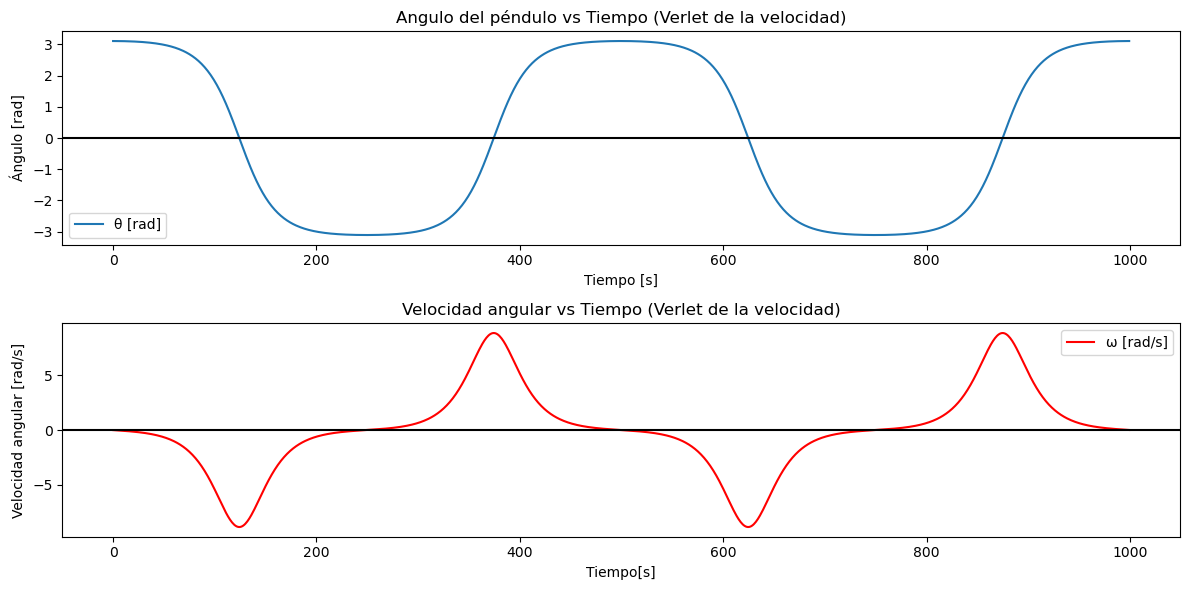

In [65]:
#Parámetros
h = 0.01 #[s] Intervalo de tiempo entre cada iteración
g = 9.81 #[m/s^2]
l = 0.5 #[m]
m = 1.0 #Kg
#Condiciones iniciales
x = 0.99*np.pi #[rad]
v = 0.0 #[m/s]

#Función que describe la aceleración
def f(x):
    return -(g/l)*np.sin(x)

#Declaración de los vectores donde se guardarán los valores
X = np.zeros(1000)
V = np.zeros(1000)
T = np.zeros(1000)

#Simulación usando el algoritmo de Verlet de la velocidad
for t in range(1000):
    x0 = x
    x = x + h*v + ((h**2)*f(x))/2
    v = v + h*(f(x0)+f(x))/2
    #Almacenando los valores de las variables a medida que se itera t
    X[t] = x
    V[t] = v
    T[t] = t+h
#Graficando la función
plt.figure(figsize=(12,6))

#Gráfica θ (X) vs t
plt.subplot(2,1,1)
plt.plot(T,X, label='θ [rad]')
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.title('Angulo del péndulo vs Tiempo (Verlet de la velocidad)')
plt.legend()

#Gráfica ω(t) vs t
plt.subplot(2,1,2)
plt.plot(T,V, label='ω [rad/s]',color='r')
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.xlabel('Tiempo[s]')
plt.ylabel('Velocidad angular [rad/s]')
plt.title('Velocidad angular vs Tiempo (Verlet de la velocidad)')
plt.legend()

plt.tight_layout() #Ajusta los márgenes de las gráficas para no encimarlas


Para poder analizar la dinámica de este sistema físico es mejor analizar su diagrama de fase $\Gamma (\theta, \omega)$:

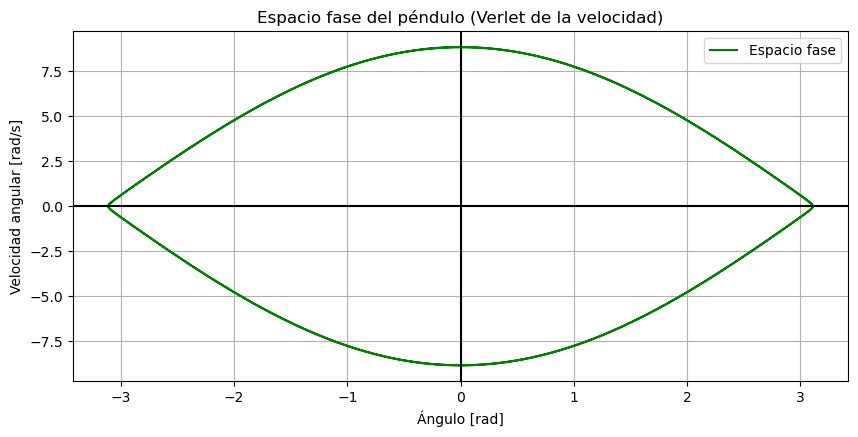

In [66]:
#Graficando el diagrama de fase  θ(t) vs ω(t) 
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(X,V,label='Espacio fase',color='g')
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.axvline(0, color='black', linestyle='-')
plt.xlabel('Ángulo [rad]')
plt.ylabel('Velocidad angular [rad/s]')
plt.title('Espacio fase del péndulo (Verlet de la velocidad)')
plt.grid(True)
plt.legend();